# Analyzing Predictors of Student Retention and Academic Success in Higher Education

## Introduction

Education is a powerful instrument for personal development and societal advancement. By fostering critical thinking, equipping individuals with essential skills, and promoting informed citizenship, education plays a crucial role in shaping futures. Higher education, in particular, has the potential to unlock life-changing opportunities. However, the increasing dropout rates observed in higher education institutions reveal a complex problem that warrants deeper investigation.

In this project, I aim to identify and analyze the key predictors influencing student dropout and academic success. By understanding these factors, we can highlight at-risk students early and inform interventions that support their academic journeys. This research focuses on a dataset containing demographic, socioeconomic, and academic performance variables, which will allow for a multifaceted exploration of the issues surrounding student retention and achievement.

## Research Question

**What are the main demographic, socioeconomic, and academic predictors that influence student dropout rates and academic success in higher education?**

## Hypothesis

**Primary Hypothesis:** Socioeconomic and demographic factors, such as family background and economic conditions, have a significant impact on student dropout rates.

**Secondary Hypothesis:** Academic performance metrics and engagement indicators, such as grades and attendance, are reliable predictors of academic success.

## Methodology

**Data Exploration:** Visualize and describe the dataset, focusing on dropout, retention, and success trends.

**Preprocessing:** Handle missing values and outliers in demographic, socioeconomic, and academic data.

**Variable Selection:** Use PCA to determine key predictors for student outcomes.

**Predictive Modeling:** Implement machine learning models, including Logistic Regression, Support Vector Machines (SVM) and Random Forest, to classify students' likelihood of dropout and predict academic success.

# Exploratory Data Analysis

## Dataset Description

The dataset originates from a higher education institution and contains detailed records of students enrolled in various programs, including demographics, socioeconomic factors, and academic performance. The dataset is structured to help build models for predicting students' status as dropout, enrolled, or graduated.

## Target Variable

The target variable for our analysis is Student Outcome, which represents three categories:

1. Dropout
2. Enrolled
3. Graduate

This outcome is designed to assess students' progress over time and help predict which students are likely to need intervention.

## Dataset Details

**Data Composition**: The dataset comprises information from multiple disjoint databases and includes attributes at enrollment (academic path, demographics, socioeconomic status) and performance metrics across semesters.

**Purpose:** Developed as part of the SATDAP program, funded by Portugal’s Public Administration, this dataset aims to help reduce dropout rates and support student success.

**Preprocessing:** The dataset has undergone preprocessing to handle outliers, inconsistencies, and ensure no missing values.

## Key Variables of Interest

**Demographics:** Marital Status, Gender, Nationality

**Socioeconomic Factors:** Mother's/Father's occupation and education, Scholarship Holder, Tuition Fees Status

**Academic History:** Previous Qualification, Admission Grade, Enrollment Data (e.g., Daytime vs. Evening Attendance)

**Macroeconomic Indicators:** Unemployment Rate, Inflation Rate, GDP at enrollment

**Other Indicators:** Application Mode and Order, Debtor Status, Educational Special Needs

These features provide a comprehensive view of student backgrounds and external factors influencing their academic paths.

## Data Cleaning and Exploration


We began by examining the dataset for any inconsistencies or anomalies, as well as verifying that there are no missing values. Here are the main steps we performed:

**Encoding Categorical Variables:** Variables such as Marital Status, Gender, and Occupation are already encoded as integers, with each value corresponding to predefined categorical groups. We will retain these variables in their current form, as they represent specific categories without implying any ordinal relationship. However, for the Target variable, while we will encode it to represent the categories clearly, we will retain it as an object type to emphasize the lack of ordinality in this variable.

**Outlier Detection and Handling:** Outliers in admission grades and age at enrollment were evaluated to ensure they align with reasonable ranges.

**Creation of New Variables:** No additional variables have been created at this stage to maintain the integrity of predictive modeling after the training/test split.

In addition to the preprocessing steps mentioned above, we will also perform standard data cleaning tasks. This includes renaming columns for improved readability and removing any unwanted characters.

In [6]:
# Loading required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Loading the dataset

student = pd.read_csv("/content/data.csv", delimiter=';')

# Concise summary of DataFrame

student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [22]:
# Inspecting first few rows

student.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Based on the descriptive statistics above, we can observe that most of the necessary preprocessing has already been done by the dataset creators, leaving our dataset relatively clean. Therefore, minimal preprocessing is required on our end. However, to optimize the data for our analysis, we will make a few adjustments.

The current column names are not ideal for analysis, so we will rename them for clarity and easier reference. Additionally, as there are no missing values in the dataset, we can proceed directly to exploratory analysis once the column names are updated.

To further streamline the analysis, standardizing column names will improve consistency, making data access and interpretation more efficient throughout the process.

In [23]:
# Correct column names that have a typo and replace single quotes with underscores

student.rename(columns = {"Nacionality": "Nationality",
                           "Mother's qualification": "Mother_qualification",
                           "Father's qualification": "Father_qualification",
                           "Mother's occupation": "Mother_occupation",
                           "Father's occupation": "Father_occupation",
                           "Age at enrollment": "Age"}, inplace = True)

# Replace white space in the column names with underscore

student.columns = student.columns.str.replace(' ', '_')

# Remove the parenthesis

student.columns = student.columns.str.replace('(', '')
student.columns = student.columns.str.replace(')', '')

In [24]:
# Doing a sanity check before we procedd

student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime/evening_attendance	                   4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nationality                                   4424 non-null   int64  
 8   Mother_qualification                          4424 non-null   int64  
 9   Father_qualification                          4424 non-null   i

In [25]:
# Explore the descriptive statistics of the dataset

print(student.describe())

       Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening_attendance\t  Previous_qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

Here, we used the `describe` function to generate the descriptive statistics of our dataset. This provides key metrics such as the mean, median, quartiles, and count for our variables. Since we have already reviewed the dataset, it appears to be well-cleaned and organized.

Examining the variables reveals a variety of distributions, suggesting that we may need to perform scaling for further processing. Imputation will not be necessary, as the dataset is already well-structured and does not contain missing values.

To begin, let's split the dataset into training (3539 rows) and test (885 rows) sets (using an 80/20 split), and create distinct visualizations on the training set to gain insights into key relationships in the data. Each visualization will highlight different aspects, providing insights into demographic factors, academic performance, economic conditions, and dropout/graduate status.

In [26]:
from sklearn.model_selection import train_test_split

# Spliting the dataset

train_df, test_df = train_test_split(student, test_size=0.2, random_state=42)

Lets start with some descriptive statistics of some variables of interest.

In [27]:
train_df[['Tuition_fees_up_to_date','Curricular_units_1st_sem_grade','Curricular_units_2nd_sem_grade']].describe()

,Tuition_fees_up_to_date,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_grade
count,3539.000000,3539.000000,3539.000000
mean,0.883018,10.626387,10.227644
std,0.321444,4.848718,5.212690
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,10.800000
50%,1.000000,12.324286,12.200000
75%,1.000000,13.400000,13.333333
max,1.000000,18.875000,18.571429


The table above reveals that the majority of students have paid their tuition fees. Additionally, the distribution of curricular grades is noteworthy, with a maximum score of 18 and a mean of 10 for both semesters. This provides an interesting insight into the academic performance of students.

### 1. Key Variable Distribution

Let's examine the distribution of the selected variables that appear significant for our analysis. These variables include: 'Age', 'Admission_grade', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade', 'Mother_qualification', 'Father_qualification', 'Unemployment_rate', 'Scholarship_holder', 'Previous_qualification_grade', and 'Tuition_fees_up_to_date'.

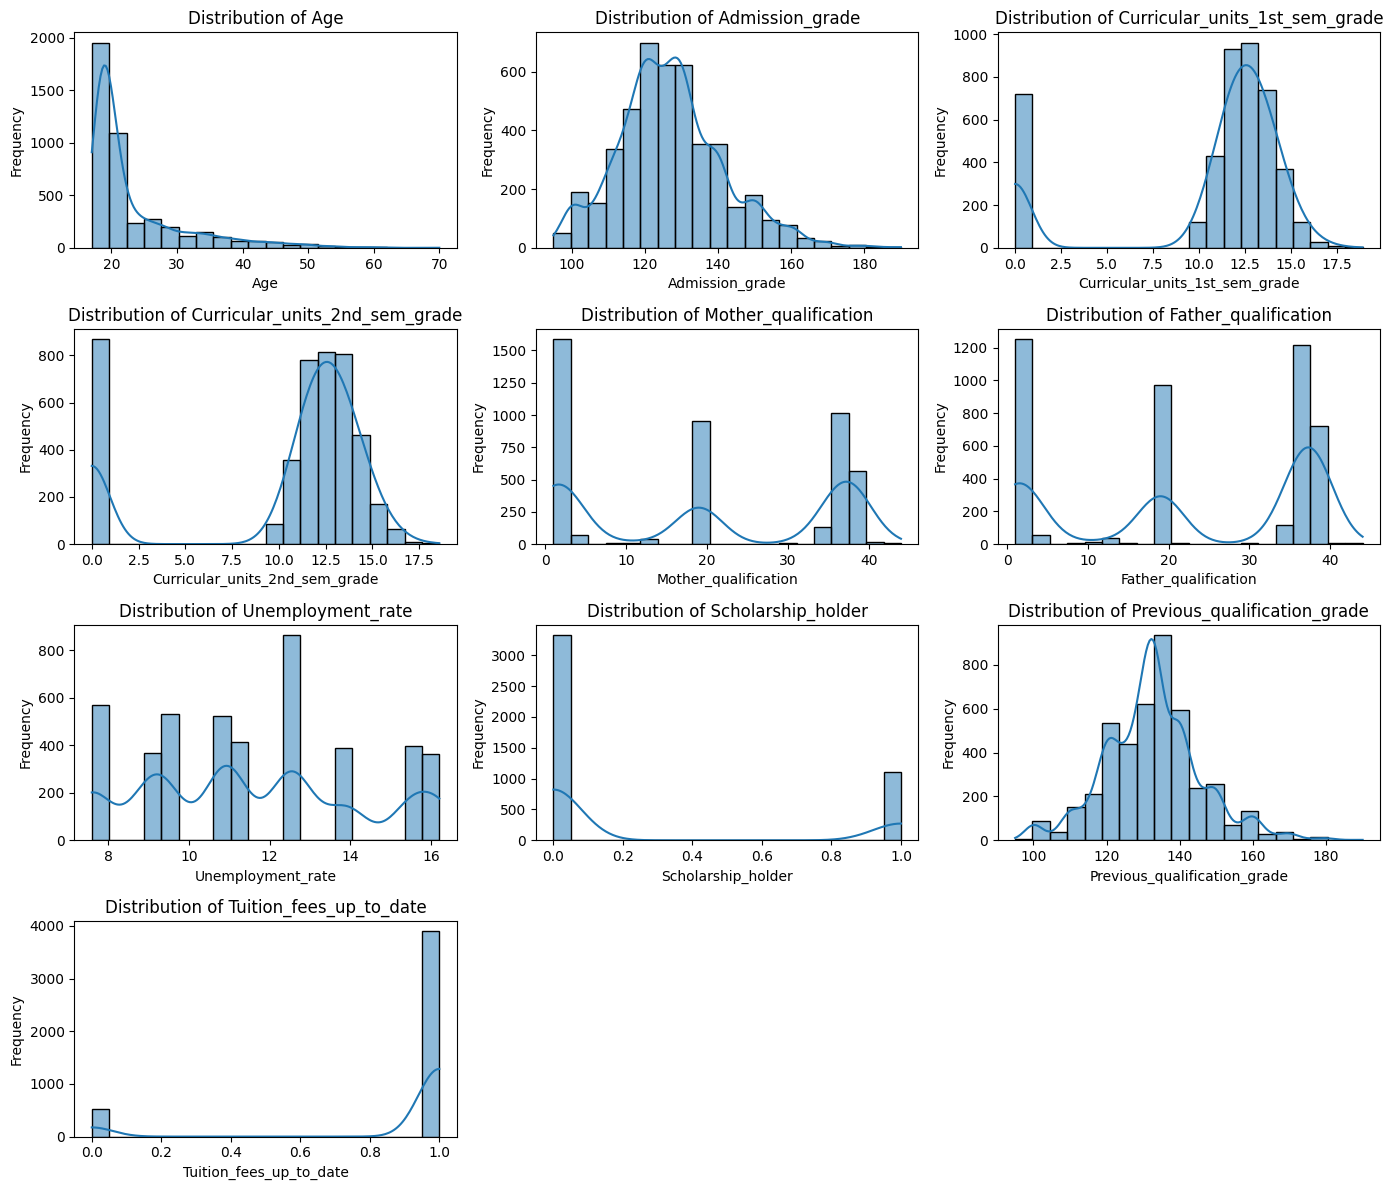

In [28]:
# List of key variables for distribution plots

key_variables = ['Age', 'Admission_grade', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',
                 'Mother_qualification', 'Father_qualification', 'Unemployment_rate',
                 'Scholarship_holder', 'Previous_qualification_grade', 'Tuition_fees_up_to_date']

# Set up the size of the overall figure

plt.figure(figsize=(14, 12))

# Loop through each key variable and plot its distribution

for i, variable in enumerate(key_variables, 1):
    plt.subplot(4, 3, i)  # Subplot layout: 4 rows, 3 columns
    sns.histplot(student[variable], bins=20, kde=True)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

# Automatically adjust the subplot layout

plt.tight_layout()

# Show all distribution plots

plt.show()

Looking at the distributions above, we observe that several variables, such as 'Admission_grade,' follow a roughly normal distribution. Age, however, is skewed to the right, which makes sense given that most students are under 30 years old. The academic credits for both the 1st and 2nd semesters show that while the majority of students perform well, there are also some with lower grades. Regarding parental qualifications, we see a range in educational levels, with fathers generally having higher qualifications than mothers. The 'Previous_qualification_grade' variable is normally distributed. Most students in our dataset do not hold scholarships, and a large portion of them are up to date with their tuition fees.

### 2. Distribution of Admission Grades by Target (Dropout/Graduate)

This plot will show how admission grades vary across the target classes. This helps us see if there is a trend between admission grades and the likelihood of dropping out or graduating.

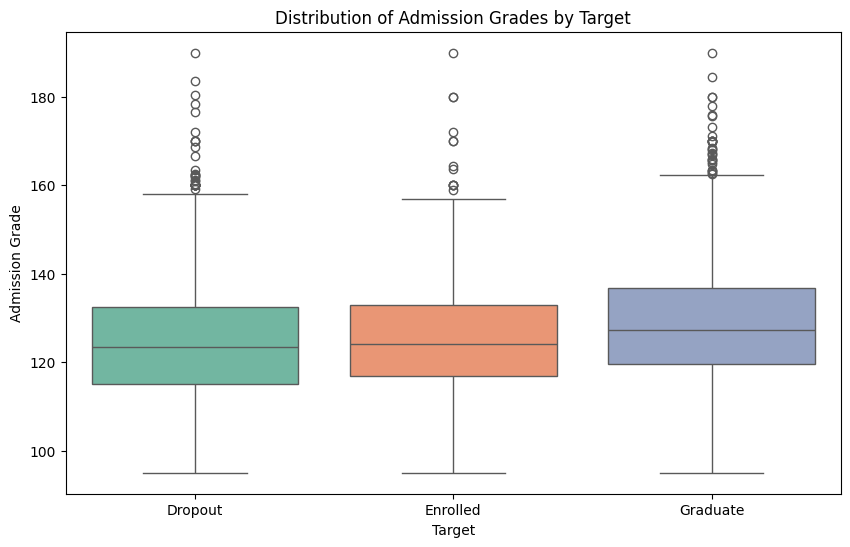

In [ ]:
# Plotting the graph

plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Target', y='Admission_grade', palette="Set2")
plt.title('Distribution of Admission Grades by Target')
plt.xlabel('Target')
plt.ylabel('Admission Grade')
plt.show()


The median and range of admission grades do not differ significantly between dropout and graduate groups. However, the boxplot reveals numerous outliers, suggesting that scaling these variables may be beneficial for a deeper analysis.

### 3. Marital Status and Target Distribution

This bar plot will show the distribution of marital status across dropout and graduate students, which could help identify if marital status is a potential predictor of dropout rates.

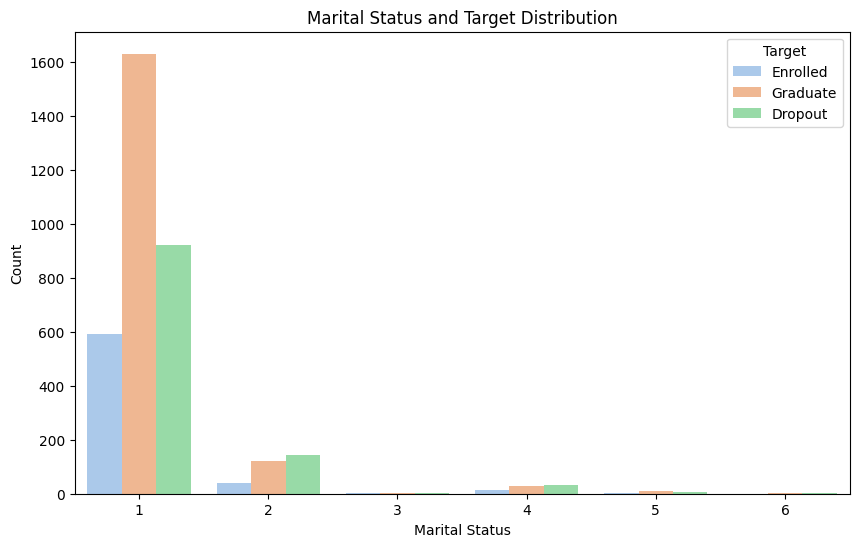

In [ ]:
# Plotting the graph

plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Marital_status', hue='Target', palette="pastel")
plt.title('Marital Status and Target Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()


This plot allows us to explore whether certain marital statuses correlate with dropout or graduation outcomes. For example, a higher dropout rate within a specific marital status group might suggest underlying socioeconomic factors. The majority of our data points fall under the "Single" category. In contrast, the "Married" category has significantly fewer observations, with most of them representing graduates or dropouts. This distribution offers insights into potential patterns within our dataset.

### 4. Relationship Between Tuition Fees and Dropout/Graduate Status

This bar plot shows the distribution of student's tuition fees up-to-date status across the target classes. It will reveal if students who are behind on tuition payments have higher dropout rates.

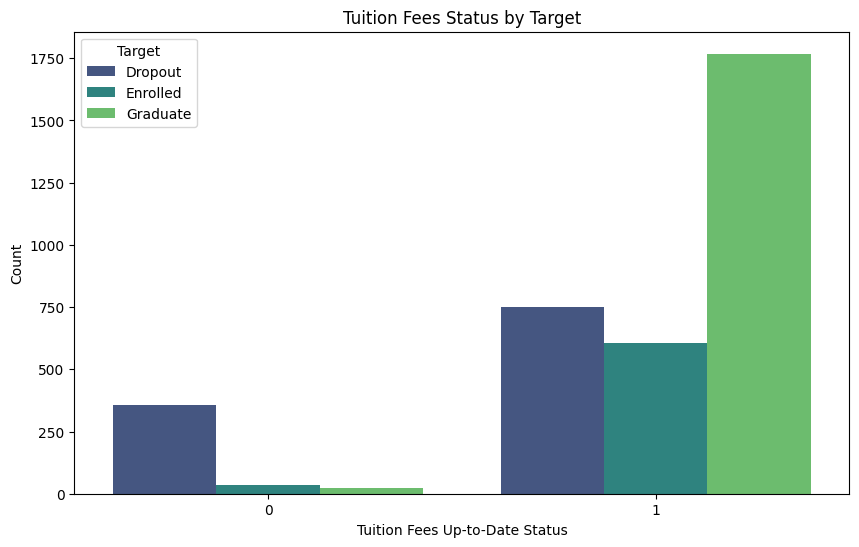

In [ ]:
# Plotting the graph

plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Tuition_fees_up_to_date', hue='Target', palette="viridis")
plt.title('Tuition Fees Status by Target')
plt.xlabel('Tuition Fees Up-to-Date Status')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()


This visualization helps identify whether students with overdue tuition fees are more likely to drop out, suggesting financial stress as a possible factor. In the plot, most students who are up to date with their tuition fees are graduating, followed by those still enrolled, with dropouts representing the smallest group. However, among students who are not up to date on their fees, dropouts are the most prevalent category. This insight suggests that overdue fees may contribute to a higher dropout rate.

### 5. Impact of Economic Factors (GDP) on Academic Outcome

This scatter plot explores the relationship between GDP and student outcomes, aiming to see if economic conditions at the time of study influence dropout rates.

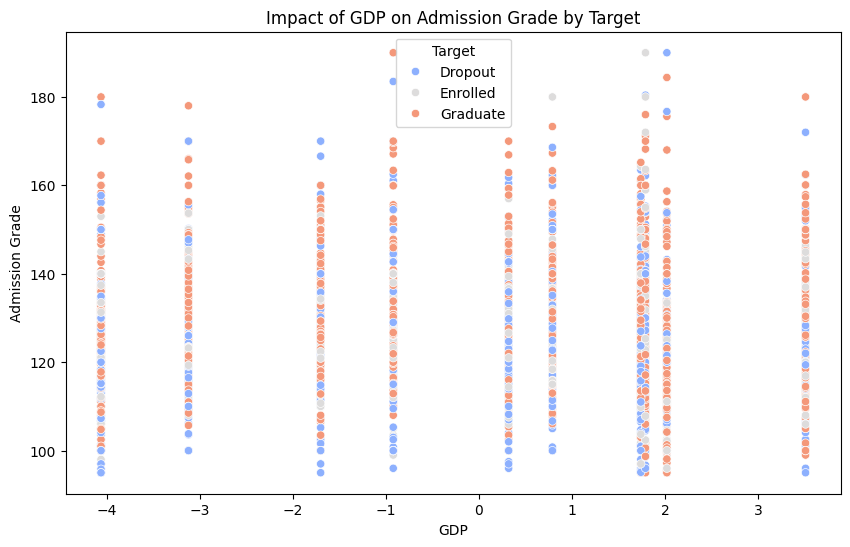

In [ ]:
# Plotting the graph

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='GDP', y='Admission_grade', hue='Target', palette="coolwarm")
plt.title('Impact of GDP on Admission Grade by Target')
plt.xlabel('GDP')
plt.ylabel('Admission Grade')
plt.legend(title='Target')
plt.show()


This plot explores whether economic conditions, represented by GDP, correlate with admission grades and dropout or graduation rates, potentially indicating that broader economic trends impact student performance and outcomes. However, the scatter plot shows no clear signs of correlation between GDP and academic grades relative to the target variable, as data points appear randomly distributed.

Now let us plot our target variable distribution.

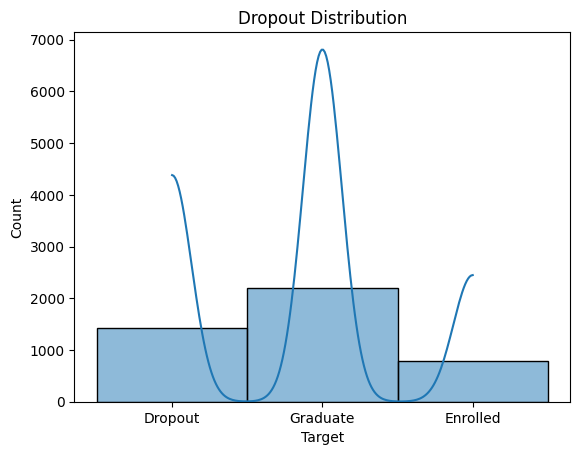

In [6]:
# Visualize distributions of target variable

sns.histplot(student['Target'], kde=True).set(title='Dropout Distribution')
plt.show()


In [8]:
# Target variable value count

train_df['Target'].value_counts()

,count
Target,
Graduate,1791
Dropout,1105
Enrolled,643


The plot above illustrates that the dataset predominantly consists of observations in the *Graduate* category, followed by *Dropout* and *Enrolled*. The value counts highlight a clear class imbalance among these categories. This uneven distribution could pose challenges for classification tasks, as models may favor the majority class. To address this, we will take steps to mitigate the impact of class imbalance in our analysis as we move forward.

### 6. Correlation Matrix

A correlation matrix heatmap will allow us to visualize the strength and direction of relationships between numeric variables in our dataset. This will be particularly useful to identify any significant correlations among predictors, or between predictors and the target variable if it's numeric.

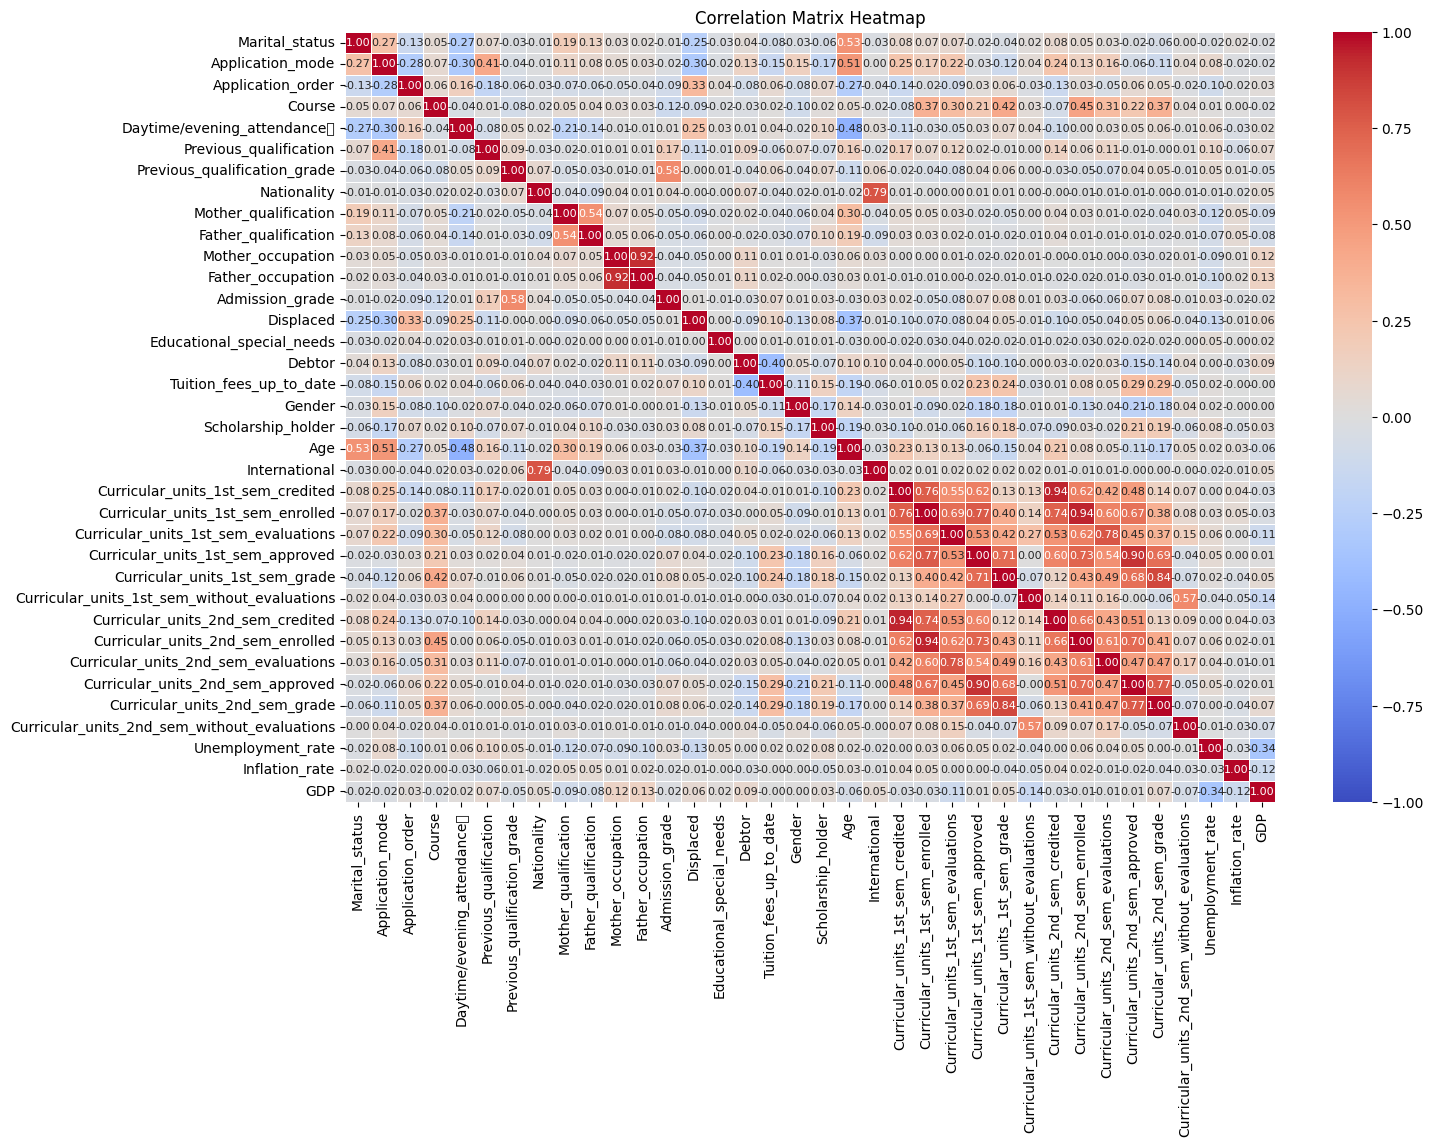

In [ ]:
# Selecting only numeric columns for correlation analysis

numeric_cols = train_df.select_dtypes(include=np.number)

# Calculate the correlation matrix

correlation_matrix = numeric_cols.corr()

# Plotting the heatmap

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1,
            linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Matrix Heatmap')
plt.show()


This heatmap highlights pairs of features with high correlation, which can aid in feature selection and help address multicollinearity in the dataset. Notably, some numerical features display strong correlations, such as between nationality and international status, age and marital status, and age and application mode. Additionally, correlations are observed among credited units for the 1st and 2nd semesters, encompassing students' grades and exams. This may indicate that consistently high grades are linked to consistent students, potentially leading to better graduation outcomes.

### Machine Learning Approach Suggestions

Based on the initial data analysis, here are a few machine learning approaches to consider:

**Logistic Regression:** To predict dropout versus graduation based on socioeconomic and academic factors.

**Random Forest:** For feature importance insights and to capture potential nonlinear relationships.

**Support Vector Machine (SVM):** To test if a decision boundary can effectively classify student outcomes.

**Gradient Boosting:** To improve performance through ensemble learning, especially if dataset size is sufficient.

These initial steps will help us better understand the data and guide the selection of the most appropriate machine learning models.

After thoroughly exploring the dataset and verifying the absence of missing values, we will not require imputation. However, to prepare the data for modeling, we will apply scaling, one-hot encoding, and hyperparameter tuning. These preprocessing steps ensure the data is suitable for machine learning models.

Since this is a multiclass classification problem, using the following models:  

1. **Random Forest Classifier**: Known for its ability to handle multiclass classification effectively, it combines decision trees to improve accuracy and mitigate overfitting.  
2. **Gradient Boosting Classifier (e.g., XGBoost or LightGBM)**: These models are robust and efficient, leveraging boosting techniques to optimize predictions for multiclass tasks.  
3. **Logistic Regression (Multinomial)**: A baseline model that provides interpretable results and works well when the relationship between features and the target variable is linear.  

For evaluation, the **F1-score** will be our primary scoring metric as it balances precision and recall, which is crucial for multiclass problems, especially when class imbalances exist. We will also consider additional metrics like **accuracy** (overall performance) and **log-loss** (penalizes incorrect predictions with higher confidence) to provide a comprehensive evaluation of model performance.

# Data Preprocessing



As part of the model selection and evaluation process, we have decided to use a combination of Logistic Regression, Random Forest Classifier, and Gradient Boosting for predicting our multiclass classification outcomes. These models were chosen for their strong performance in handling multi-class problems and their interpretability.

Before proceeding with model training, we need to prepare our data to ensure it is in the best format for our models. This includes several preprocessing steps:

1. Scaling: We will scale the numerical features using StandardScaler to standardize them. Scaling ensures that features have comparable ranges, which is particularly important for models like Logistic Regression and Gradient Boosting that rely on distance-based calculations.

2. Dimensionality Reduction: To optimize model performance and reduce computational complexity, we will use Principal Component Analysis (PCA). PCA will help us reduce the dimensionality of the dataset by identifying the most important features (principal components) that capture the most variance in the data. This step will also assist in improving model performance by mitigating issues such as overfitting.

3. Hyperparameter Tuning: Once the data is preprocessed, we will perform Hyperparameter Tuning using Grid Search. This technique will allow us to find the optimal hyperparameters for each model, ensuring that they perform at their best on the dataset.

These preprocessing steps will ensure that our models are trained on clean, standardized data and are tuned to perform optimally for the multiclass classification problem at hand.

In [4]:
# Loading required libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.compose import ColumnTransformer


In [8]:
# Splitting the data into training and testing

# Assuming 'df' is your DataFrame and 'target' is the column you're predicting
X = student.drop('Target', axis=1)
y = student['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now that we have split the data, we can begin working to process both the training and test sets with scaling. After that, we will utilise PCA for dimensionality reduction. This will integrate everything in one process, ensuring that we apply the transformations and model fitting steps consistently for both the training and test sets, while considering that all of our variables are numeric, so one-hot encoding is not required.

In [9]:
# Scaling the features using StandardScaler

scaler = StandardScaler()

# Fit and transform the training set, transform the test set

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Since all variables are numeric, we scale them using StandardScaler to standardize the features to have a mean of 0 and a standard deviation of 1. This ensures that all features are on the same scale, which helps improve model performance.

In [10]:
# Apply PCA for dimensionality reduction

pca = PCA(n_components=0.95)  # Retaining 95% of the variance

# Fit PCA on the training set and transform both training and test sets

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


We use PCA to reduce the dimensionality of our data. By setting n_components=0.95, we retain 95% of the variance in the dataset, which can improve the model's efficiency and reduce overfitting by removing less important features. Let's take a look at the variance explained by each principal component.

In [11]:
# Proportion of variance explained by each principal component

explained_variance = pca.explained_variance_ratio_

# Printing the explained variance for each component

for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.4f}")

Principal Component 1: 0.1778
Principal Component 2: 0.0990
Principal Component 3: 0.0585
Principal Component 4: 0.0565
Principal Component 5: 0.0529
Principal Component 6: 0.0466
Principal Component 7: 0.0438
Principal Component 8: 0.0432
Principal Component 9: 0.0360
Principal Component 10: 0.0339
Principal Component 11: 0.0303
Principal Component 12: 0.0278
Principal Component 13: 0.0275
Principal Component 14: 0.0260
Principal Component 15: 0.0246
Principal Component 16: 0.0221
Principal Component 17: 0.0214
Principal Component 18: 0.0200
Principal Component 19: 0.0175
Principal Component 20: 0.0162
Principal Component 21: 0.0157
Principal Component 22: 0.0148
Principal Component 23: 0.0130
Principal Component 24: 0.0125
Principal Component 25: 0.0115
Principal Component 26: 0.0108


As observed above, the proportions of variance explained by each component indicate that approximately 50% of the variance is captured by the first seven components.

In [12]:
# Cumulative explained variance

cumulative_variance = np.cumsum(explained_variance)

# The minimum number of components to explain more than 50% of the variance

num_components = np.argmax(cumulative_variance >= 0.50) + 1
print(f"Minimum number of components explaining more than 50% of the variance: {num_components}")

Minimum number of components explaining more than 50% of the variance: 7


# Model Selection and Hyperparameter Tuning

In [13]:
# Define a dictionary of models and their hyperparameters

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Hyperparameter tuning for Random Forest as an example

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV to find the best hyperparameters

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train_pca, y_train)

# Best model after tuning

best_rf_model = grid_search_rf.best_estimator_
print(f'Best Random Forest Model: {best_rf_model}')




Best Random Forest Model: RandomForestClassifier(n_estimators=50)


In [15]:
print(grid_search_rf.best_params_)


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


We define three models for our classification task: Logistic Regression, Random Forest, and Support Vector Machine (SVM). Next, we set up a grid search for hyperparameter tuning, focusing on Random Forest. The `GridSearchCV` method helps identify the best combination of hyperparameters by evaluating various options using cross-validation (in this case, 5-fold cross-validation). This ensures that we select the best parameters based on model performance.

For the Random Forest, we define a set of potential hyperparameters to explore through the grid search:

- `'n_estimators': [50, 100, 200]`: The number of trees in the forest.
- `'max_depth': [None, 10, 20, 30]`: The maximum depth of the trees.
- `'min_samples_split': [2, 5, 10]`: The minimum number of samples required to split an internal node.

By applying `GridSearchCV`, we fit the training set to find the optimal hyperparameters. After running the grid search, we identify the best model based on the performance metrics and report the optimal values for our Random Forest classifier.

The best parameters obtained from the grid search for our Random Forest model are:
- `min_samples_split = 2`
- `n_estimators = 50`
- `'max_depth'= None`

With these optimal hyperparameters, the best Random Forest model is:
Random Forest Model: RandomForestClassifier(min_samples_split = 2, n_estimators = 50).

These optimal values enable us to create a Random Forest model that is well-tuned and capable of providing accurate predictions for our multiclass classification problem, offering the best balance between bias and variance.

Now we evaluate the performance of the models we trained using the test data. We begin by fitting each model (Random Forest, Logistic Regression, and Support Vector Machine) to the training data that has been transformed using Principal Component Analysis (PCA). After training, we make predictions on the test dataset to assess how well the models generalize to unseen data.

### Evaluation Metric

As we are dealing with imbalanced classes, F1 score is valuable because it prioritizes correct predictions for minority classes without being overly influenced by majority class performance. To evaluate performance, we will use key metrics such as **accuracy** (the proportion of correct predictions) and **F1-score** (a harmonic mean of precision and recall, especially useful for imbalanced datasets). Additionally, we generate a classification report to gain a detailed breakdown of metrics for each class. By comparing these metrics, we identify which model performs the best in predicting the outcomes. This step ensures that our chosen models and hyperparameters are effective and meet the project's objectives.

In [16]:
# Fitting the best Random Forest model to the training data

best_rf_model = RandomForestClassifier(min_samples_split=2, n_estimators=50, random_state=42)
best_rf_model.fit(X_train_pca, y_train)

# Predicting on the test set

rf_predictions = best_rf_model.predict(X_test_pca)

# Evaluating the model performance

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"F1-Score: {rf_f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

# Logistic Regression

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_pca, y_train)

logistic_predictions = logistic_model.predict(X_test_pca)

logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions, average='weighted')

print("\nLogistic Regression Results:")
print(f"Accuracy: {logistic_accuracy:.2f}")
print(f"F1-Score: {logistic_f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, logistic_predictions))

# Support Vector Machine (SVM)

svm_model = SVC(random_state=42)
svm_model.fit(X_train_pca, y_train)

svm_predictions = svm_model.predict(X_test_pca)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("\nSupport Vector Machine Results:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"F1-Score: {svm_f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, svm_predictions))


Random Forest Results:
Accuracy: 0.72
F1-Score: 0.70

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.80      0.70      0.75       316
    Enrolled       0.45      0.21      0.29       151
    Graduate       0.72      0.93      0.81       418

    accuracy                           0.72       885
   macro avg       0.66      0.61      0.61       885
weighted avg       0.70      0.72      0.70       885


Logistic Regression Results:
Accuracy: 0.74
F1-Score: 0.72

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.84      0.72      0.77       316
    Enrolled       0.45      0.30      0.36       151
    Graduate       0.74      0.91      0.81       418

    accuracy                           0.74       885
   macro avg       0.68      0.64      0.65       885
weighted avg       0.73      0.74      0.72       885


Support Vector Machine Results:
Accuracy: 0.75
F1-Score: 0.73

Classificatio

The results of our model evaluation indicate that the Support Vector Machine (SVM) performed slightly better than the other models, with an accuracy of 75% and an F1-Score of 0.73. Logistic Regression followed closely with an accuracy of 74% and an F1-Score of 0.72, while the Random Forest achieved an accuracy of 73% and an F1-Score of 0.70. These metrics suggest that all three models are reasonably effective in predicting the outcomes, but SVM offers a slight edge in overall performance.


Since our target class is **Dropout**, it's crucial to analyze how well the models perform in predicting this specific outcome. The precision, recall, and F1-Score for the Dropout class are highest in the SVM model, with an F1-Score of 0.79. This indicates that SVM is more capable of accurately identifying students likely to drop out compared to the other models. Logistic Regression also performs well for Dropout, with an F1-Score of 0.77, while Random Forest achieves an F1-Score of 0.76. However, all models show lower performance in predicting the **Enrolled** class, indicating potential areas for improvement, such as using additional features or more advanced techniques.


Overall, while all models are fairly robust, the SVM stands out as the most effective for identifying dropouts, aligning with the primary goal of our project.

## Model Evaluation
Bias-Variance Tradeoff: The Random Forest model showed signs of overfitting, especially with its high precision but lower recall for enrolled students. The SVM model had a better tradeoff, with more consistent performance across all classes.

Interpretability: Logistic Regression, being a linear model, is more interpretable, making it easier to understand how individual features contribute to the prediction of dropouts. However, it lacks the flexibility of Random Forest and SVM.

Flexibility: Random Forest and SVM are more flexible in capturing complex patterns, though at the cost of interpretability.

# Ethical Implications

The dataset used in this analysis originates from a specific higher education institution in Portugal, which raises important ethical considerations regarding the generalizability and fairness of the model. One key limitation is the potential **bias** in the dataset, as it only represents students from a particular region and institution, which may not reflect the diverse experiences of students in other countries or universities. As a result, the model's predictions may be skewed when applied to students from different educational systems or regions. The risk of **misuse** of the model's predictions is also a concern; for instance, if misclassifications occur (such as students being falsely identified as dropouts), it could lead to unnecessary interventions or support programs that might stigmatize students. Conversely, if students who are at risk of dropping out are missed, they might not receive the timely help they need. To mitigate these concerns, it's important to incorporate fairness checks and ensure that the model is regularly updated with data from a broader range of institutions to improve its generalizability. Additionally, implementing transparency in how predictions are made and how they will be used, as well as ensuring that human oversight remains a part of the decision-making process, can help reduce the risks associated with reliance on automated predictions.

This project illustrates how machine learning can be used to predict student dropout, with key insights gained from different models. The results emphasize the importance of choosing the right model and metric to handle imbalanced datasets, and offer useful guidance for educational institutions looking to intervene early and reduce dropout rates.